# The Spark Foundation Task# 3
## Exploratory Data Analysis - Retail
### Author- Sanjay Goyal

In [55]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Read dataset
df = pd.read_csv("SampleSuperstore.csv")

In [57]:
# Set pandas option to show max and row range
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [58]:
# Show dataFrame
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [59]:
# Make a list of columns in data frame
cols = df.columns
cols

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [60]:
# Check null values and data-types for each columns
""" There is no null values so no need to data preprocessing"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [61]:
""" There are 4 class in Ship Mode and 3 Segment Category"""
df["Ship Mode"].unique(), df["Segment"].unique(), df["Country"].unique(), df["State"].unique()

(array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
 array(['United States'], dtype=object),
 array(['Kentucky', 'California', 'Florida', 'North Carolina',
        'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
        'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
        'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
        'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
        'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
        'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
        'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
        'District of Columbia', 'Kansas', 'Vermont', 'Maine',
        'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
        'West Virginia'], dtype=object))

In [62]:
df["Region"].unique(), df["Category"].unique(), df["Sub-Category"].unique()

(array(['South', 'West', 'Central', 'East'], dtype=object),
 array(['Furniture', 'Office Supplies', 'Technology'], dtype=object),
 array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
        'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
        'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
        'Copiers'], dtype=object))

### Data Statistic

In [63]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


### Check Which Ship Mode have Most Profit and Sales.?

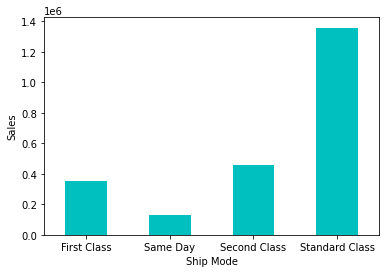

In [118]:
df.groupby('Ship Mode')['Sales'].sum().plot(kind="bar", figsize=(6,4), color='c', rot=0, ylabel="Sales")
plt.show()

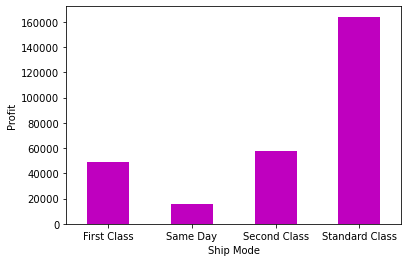

In [119]:
df.groupby('Ship Mode')['Profit'].sum().plot(kind="bar", figsize=(6,4), color='m', rot=0, ylabel='Profit')
plt.show()

In [66]:
""" Standard Class Ship Mode have Most Sales and Profit"""

' Standard Class Ship Mode have Most Sales and Profit'

### Which Sagment Have Most Sales and Profit.?

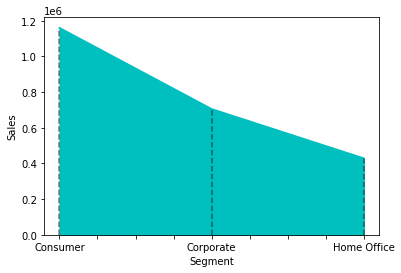

In [116]:
x = df.groupby('Segment')['Sales'].sum().keys()
y = df.groupby('Segment')['Sales'].sum()
df.groupby('Segment')['Sales'].sum().plot(kind="area", figsize=(6,4), color='c', rot=0, ylabel='Sales')
plt.vlines(x, 0, y, color='black', linestyles='--', alpha=0.5)
plt.show()

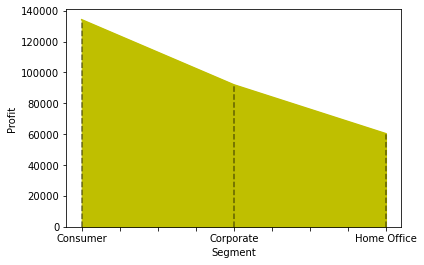

In [224]:
x = df.groupby('Segment')['Profit'].sum().keys()
y = df.groupby('Segment')['Profit'].sum()
df.groupby('Segment')['Profit'].sum().plot(kind="area", figsize=(6,4), color='y', rot=0, ylabel='Profit')
plt.vlines(x, 0, y, color='black', linestyles='--', alpha=0.5)
plt.show()

In [69]:
""" Consumer Segment have Most Sales and Profit"""

' Consumer Segment have Most Sales and Profit'

### State Have Most Sales, Profit and Quantity of Product sale

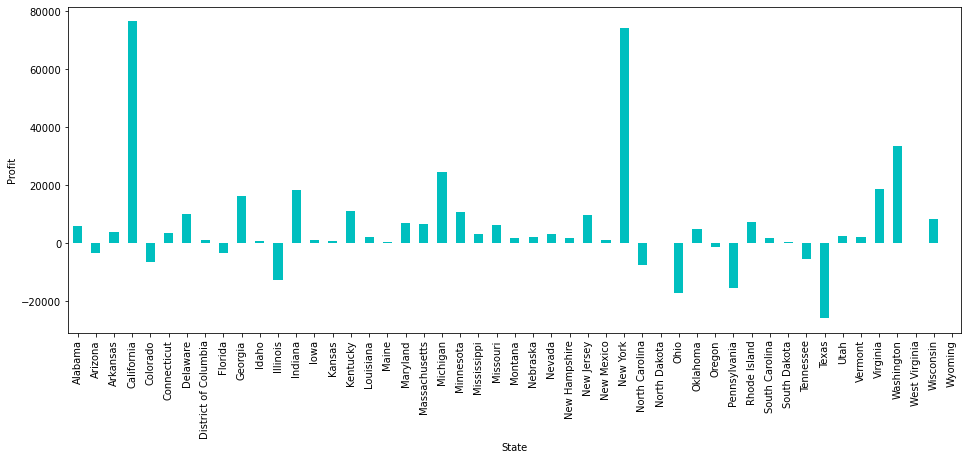

In [70]:
df.groupby('State')['Profit'].sum().plot(kind="bar", figsize=(16,6), color='c', ylabel="Profit")
plt.show()

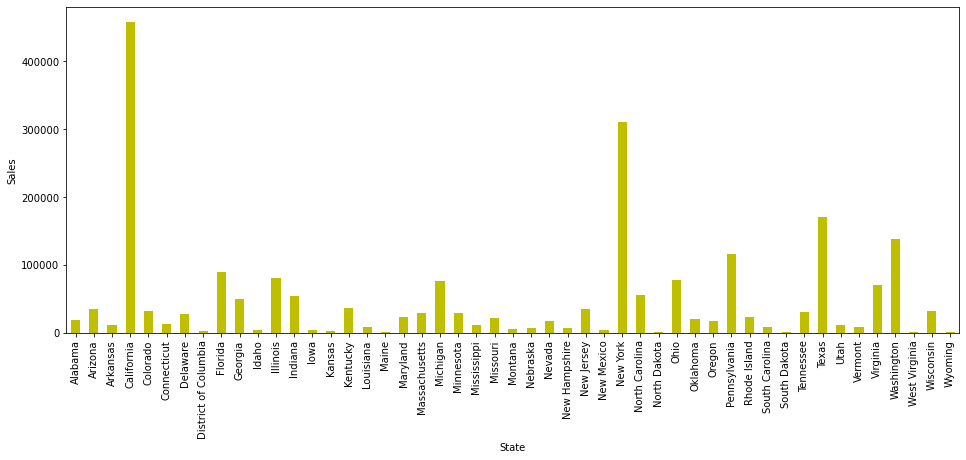

In [71]:
df.groupby('State')['Sales'].sum().plot(kind="bar", figsize=(16,6), color='y', ylabel="Sales")
plt.show()

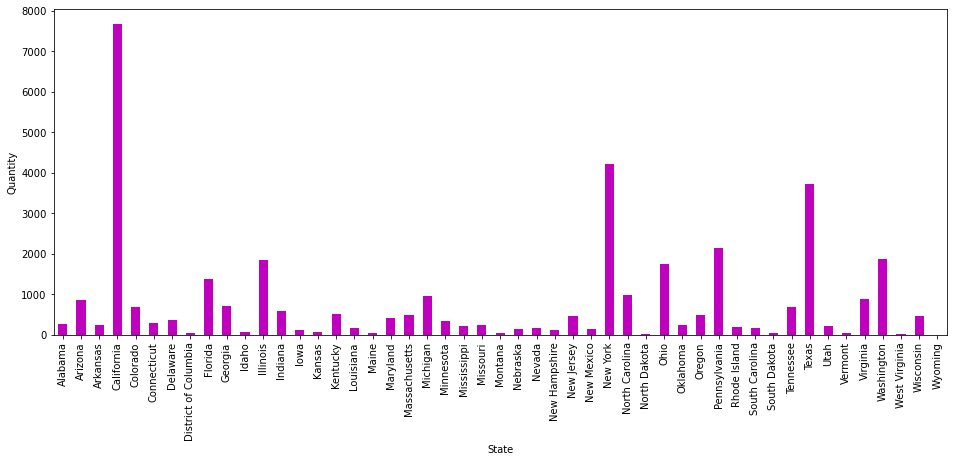

In [72]:
df.groupby('State')['Quantity'].sum().plot(kind="bar", figsize=(16,6), color='m', ylabel="Quantity")
plt.show()

In [73]:
""" From The above Data Exploration We found that the California state have the Most Sales, Profit And Quatity sales"""

' From The above Data Exploration We found that the California state have the Most Sales, Profit And Quatity sales'

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Which Category and Sub-Category have Most sales and Profit?

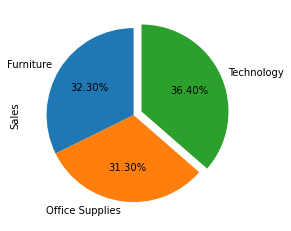

In [136]:
df.groupby('Category')['Sales'].sum().plot(kind="pie", figsize=(6,4), autopct='%1.2f%%', explode=(0,0,.1), startangle=90)
plt.show()

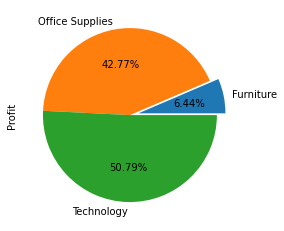

In [140]:
df.groupby('Category')['Profit'].sum().plot(kind="pie", figsize=(6,4), autopct='%1.2f%%', explode=(.1,0,0))
plt.show()

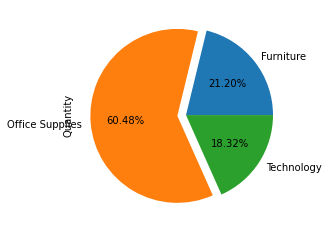

In [165]:
df.groupby('Category')['Quantity'].sum().plot(kind="pie", figsize=(6,4), autopct='%1.2f%%', explode=(0,.1,0),)
plt.show()

In [78]:
""" Here you can see that Most Sales and Profit in Technology Category while Most Quantity unit sold in Office Supplies Category"""

' Here you can see that Most Sales and Profit in Technology Category while Most Quantity unit sold in Office Supplies Category'

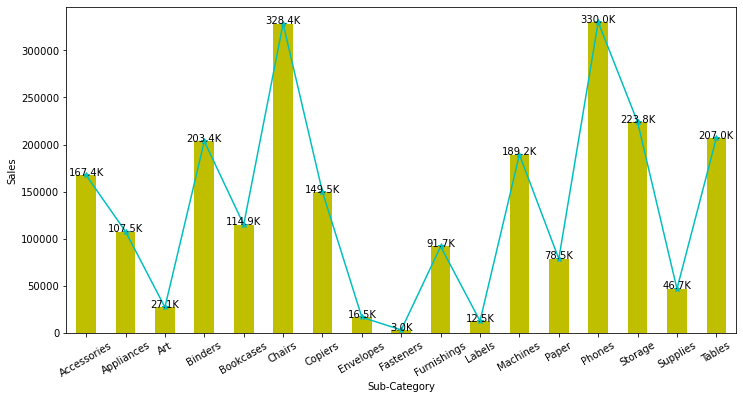

In [250]:
df.groupby('Sub-Category')['Sales'].sum().plot(kind="bar", figsize=(12,6), color='y', ylabel="Sales",)
df.groupby('Sub-Category')['Sales'].sum().plot(kind="line", figsize=(12,6), color='c', ylabel="Sales", marker='*',rot=30)
for i, j in enumerate(df.groupby('Sub-Category')['Sales'].sum()):
    plt.text(i, j, f"{round(j/1000, 1)}K", ha='center')
plt.show()

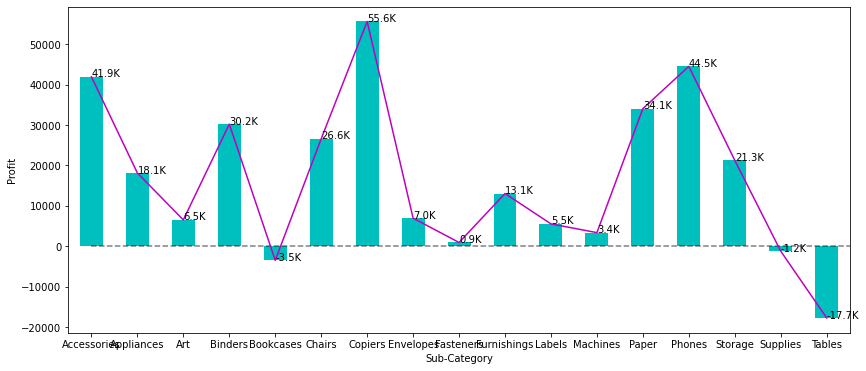

In [249]:
df.groupby('Sub-Category')['Profit'].sum().plot(kind="bar", figsize=(14,6), color='c', ylabel="Profit")
df.groupby('Sub-Category')['Profit'].sum().plot(kind="line", figsize=(14,6), color='m', ylabel="Profit")
plt.hlines(0, 0, 17, color='black', linestyles='--', alpha=0.5)
for i, j in enumerate(df.groupby('Sub-Category')['Profit'].sum()):
    plt.text(i, j, f"{round(j/1000, 1)}K")
plt.show()

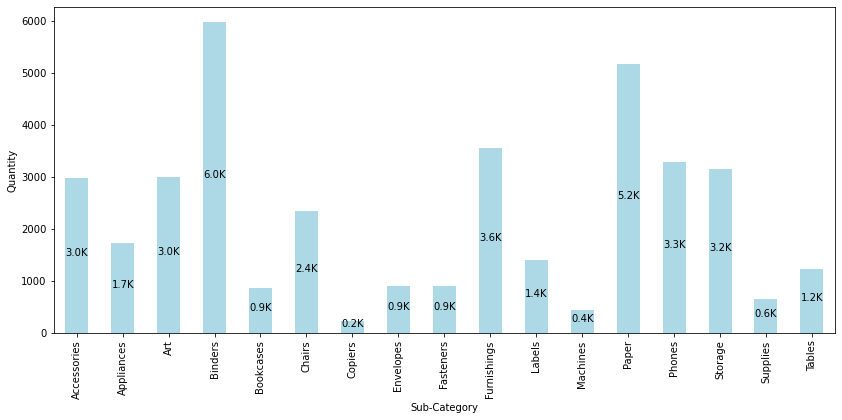

In [227]:
df.groupby('Sub-Category')['Quantity'].sum().plot(kind="bar", figsize=(14,6), color='lightblue', ylabel="Quantity")
for i, j in enumerate(df.groupby('Sub-Category')['Quantity'].sum()):
    plt.text(i, j//2, f"{round(j/1000, 1)}K", ha='center')
plt.show()

In [83]:
""" Here seen that Most Sales in Phones, Profit in Copiers and Quntity sold in Binders"""

' Here seen that Most Sales in Phones, Profit in Copiers and Quntity sold in Binders'

### Which Sub-Category have Most Discount given?

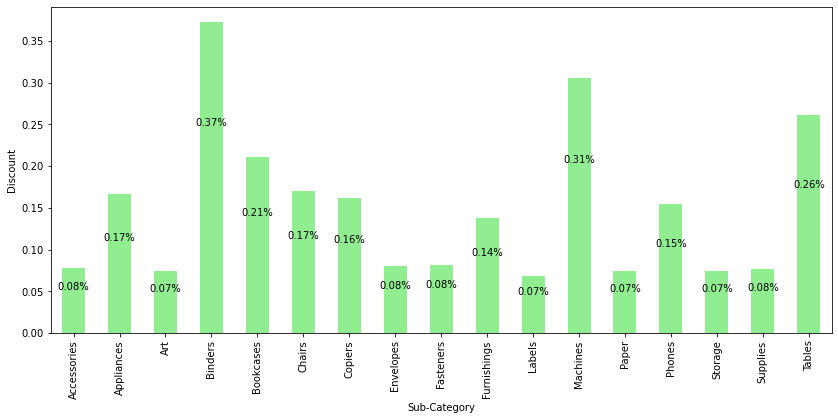

In [226]:
df.groupby('Sub-Category')['Discount'].mean().plot(kind="bar", figsize=(14,6), color='lightgreen', ylabel="Discount")
for i, j in enumerate(df.groupby('Sub-Category')['Discount'].mean()):
    plt.text(i, j/1.5, f"{round(j,2)}%", ha='center')
plt.show()

In [85]:
"""Here we can see that Binder subcategory have most discount given"""

'Here we can see that Binder subcategory have most discount given'

In [86]:
pd.crosstab(columns=df['Sub-Category'], index=df['Discount'].max())

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
row_0,,,,,,,,,,,,,,,,,
0.8,775,466,796,1523,228,617,68,254,217,957,364,115,1370,889,846,190,319


## Which Region have most Sales and Profits

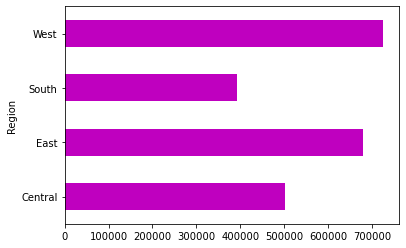

In [230]:
df.groupby('Region')['Sales'].sum().plot(kind='barh', figsize=(6,4), color='m')
plt.show()

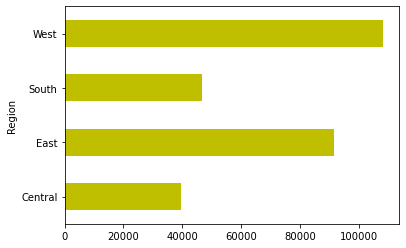

In [220]:
df.groupby('Region')['Profit'].sum().plot(kind='barh', figsize=(6,4), color='y')
plt.show()

In [89]:
""" Here most Sales and Profit in West Region"""

' Here most Sales and Profit in West Region'